In [36]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


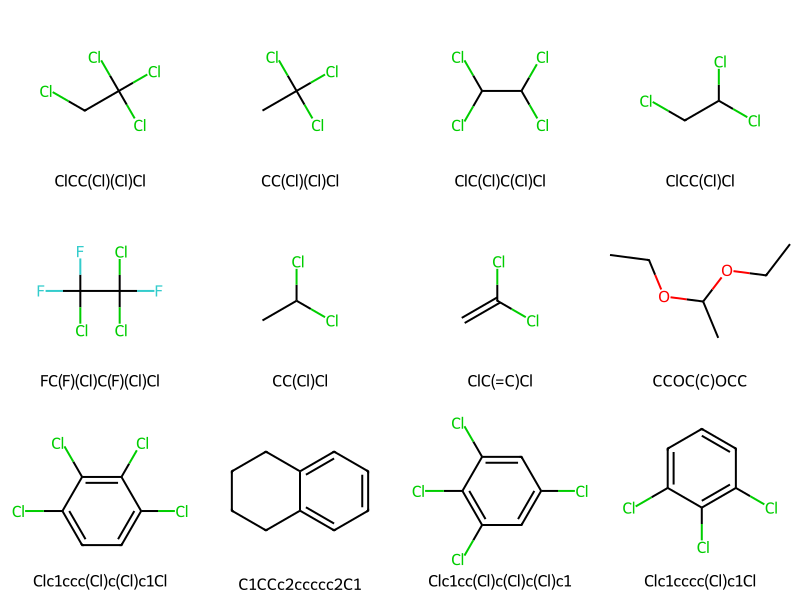

In [32]:
#Creating grid image
#SMILES strings into RDKit molecule objects
mols = [Chem.MolFromSmiles(s) for s in df['SMILES'][:12]] 
img = Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200, 200), legends=df['SMILES'][:12].tolist())
img

In [26]:
#Dataset
url = 'https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv'
df = pd.read_csv(url)

#Columns
print("Columns in this dataset:", df.columns.tolist())
df.head(3)

Columns in this dataset: ['Compound ID', 'measured log(solubility:mol/L)', 'ESOL predicted log(solubility:mol/L)', 'SMILES']


,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl


In [27]:
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        logp = Descriptors.MolLogP(mol)
        mw = Descriptors.MolWt(mol)
        rb = Descriptors.NumRotatableBonds(mol)
        
        # Aromatic Proportion calculation
        aromatic_atoms = [mol.GetAtomWithIdx(i).GetIsAromatic() for i in range(mol.GetNumAtoms())]
        num_aromatic = sum(aromatic_atoms)
        heavy_atoms = mol.GetNumHeavyAtoms()
        ap = num_aromatic / heavy_atoms if heavy_atoms > 0 else 0
        
        return pd.Series([logp, mw, rb, ap])
    return pd.Series([None, None, None, None])

# Create the new columns
df[['LogP', 'MW', 'NumRotatableBonds', 'AP']] = df['SMILES'].apply(calculate_descriptors)

In [33]:
# Define Features (X) and Target (y)
X = df[['LogP', 'MW', 'NumRotatableBonds', 'AP']]
y = df.iloc[:, -1] # for error fix

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")

R^2 Score: 1.00


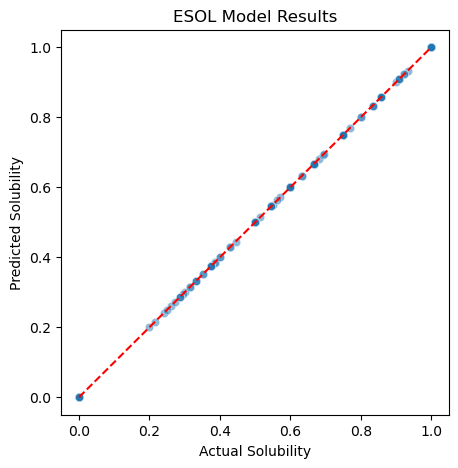

In [30]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

# Add the perfect-fit line
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', ls='--')

plt.xlabel('Actual Solubility')
plt.ylabel('Predicted Solubility')
plt.title('ESOL Model Results')
plt.show()

In [35]:
!git add .
!git commit -m "Finished ESOL model and visualization"
!git push

[main 32fe38d] Finished ESOL model and visualization
 Committer: küb <kub@ZERDA-MacBook-Pro-2.local>
Adınız ve e-posta adresiniz kullanıcı adınız ve makine adı temel alınarak
kendiliğinden yapılandırıldı. Lütfen doğru olup olmadığını denetleyin.
Bu iletiyi onları el ile belirterek gizleyebilirsiniz. Aşağıdaki komutu
çalıştırın ve yapılandırma dosyanızı düzenlemek için düzenleyicinizdeki
yönergeleri izleyin:

	git config --global --edit

Bundan sonra bu işleme için kullanılan kimliği düzeltmek isteyebilirsiniz:

	git commit --amend --reset-author

 1 file changed, 75 insertions(+), 3 deletions(-)
Nesneler ortaya dökülüyor: 5, bitti.
Nesneler sayılıyor: 100% (5/5), bitti.
Delta sıkıştırması 8 iş parçacığı kullanıyor
Nesneler sıkıştırılıyor: 100% (3/3), bitti.
Nesneler yazılıyor: 100% (3/3), 90.45 KiB | 12.92 MiB/sn, bitti.
Toplam 3 (delta 1), yeniden kullanılan 0 (delta 0), yeniden kullanılan paket 0 (0 konumundan)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To g